# Create Group Report

In [1]:
%config Completer.use_jedi = False

In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from pynwb import NWBHDF5IO
from convnwb.io import get_files

from spiketools.plts.data import plot_hist
from spiketools.plts.utils import make_axes

In [3]:
import seaborn as sns
sns.set_context('talk')

In [4]:
import sys
sys.path.append('../code')
from reports import create_group_info, create_group_str, create_group_sessions_str

## Settings

In [5]:
# Set which task to analyze
task = 'THF'

In [6]:
# Define the base data folder
data_folder = Path('/Users/tom/Documents/Data/JacobsLab/TH/')

In [7]:
# Get the list of NWB files
nwbfiles = get_files(data_folder / 'NWB')
nwbfiles = [file for file in nwbfiles if task in file]

## Collect Summary Information

In [8]:
# Define summary data to collect
summary = {
    'ids' : [],
    'n_trials' : [],
    'n_units' : [],
    'n_keep' : [],
    'error' : [],
    'correct' : []
}

In [9]:
for nwbfile in nwbfiles:
    
    # Load NWB file
    io = NWBHDF5IO(str(data_folder / 'NWB' / nwbfile), 'r')
    nwbfile = io.read()

    # Get the subject & session ID from file
    subj_id = nwbfile.subject.subject_id
    session_id = nwbfile.session_id
    
    # Collect summary information
    summary['ids'].append(session_id)
    summary['n_trials'].append(len(nwbfile.trials))
    summary['n_units'].append(len(nwbfile.units))
    summary['n_keep'].append(sum(nwbfile.units.keep[:]))
    summary['error'].append(np.median(nwbfile.trials.error[:]))
    summary['correct'].append(np.mean(nwbfile.trials.correct[:]) * 100)

## Check individual sessions

In [10]:
# Create detailed information for each session
print('\n'.join(create_group_sessions_str(summary)))

wv001-session_2 ( 24 trials):  57 keep units ( 81 total), (38.33% correct, avg error: 18.96)
wv001-session_3 ( 24 trials):  77 keep units (120 total), (45.00% correct, avg error: 14.98)
wv001-session_4 ( 40 trials):  51 keep units ( 93 total), (32.00% correct, avg error: 16.28)
wv002-session_0 ( 20 trials):  78 keep units (101 total), (17.65% correct, avg error: 29.65)
wv002-session_1 (  7 trials):  54 keep units ( 64 total), (17.65% correct, avg error: 21.94)
wv003-session_0 ( 24 trials):  19 keep units ( 34 total), (10.00% correct, avg error: 29.64)
wv004-session_0 ( 24 trials): 103 keep units (142 total), (35.00% correct, avg error: 21.49)
wv004-session_1 ( 24 trials):  89 keep units (120 total), (58.33% correct, avg error: 10.15)


## Create Report

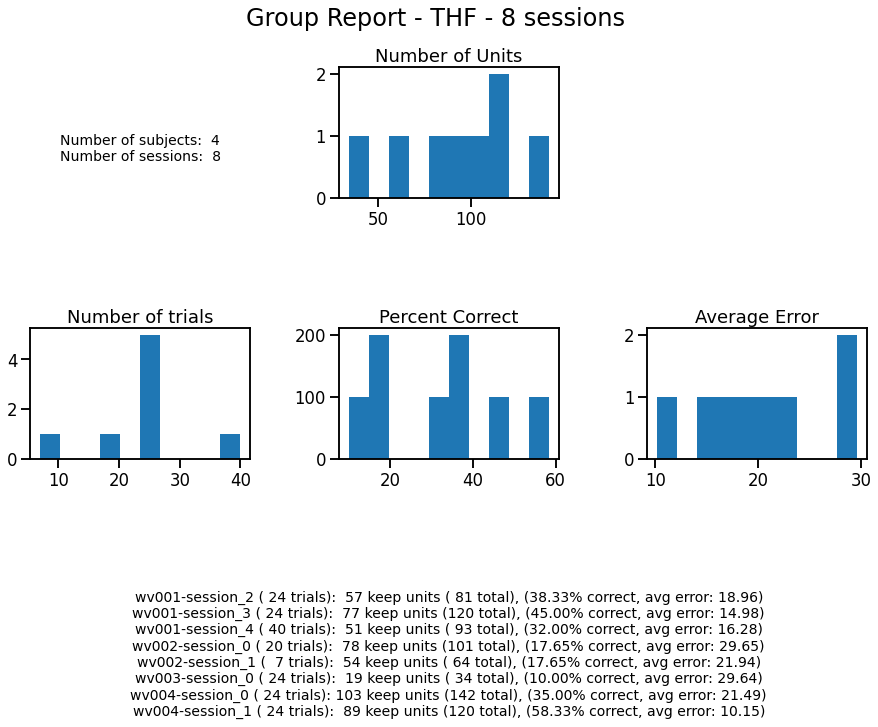

In [11]:
# Initialize figure
_ = plt.figure(figsize=(15, 12))
grid = gridspec.GridSpec(3, 3, wspace=0.4, hspace=1.0)
plt.suptitle('Group Report - {} - {} sessions'.format(task, len(summary['ids'])), fontsize=24, y=0.95);

# 00: group text
ax00 = plt.subplot(grid[0, 0])
subject_text = create_group_str(create_group_info(summary))
ax00.text(0.5, 0.5, subject_text, fontdict={'fontsize' : 14}, ha='center', va='center');
ax00.axis('off');

# 01: neuron firing 
ax01 = plt.subplot(grid[0, 1])
plot_hist(summary['n_units'], title='Number of Units', ax=ax01)

# 10-12: behavioural data
ax10 = plt.subplot(grid[1, 0])
plot_hist(summary['n_trials'], title='Number of trials', ax=ax10)
ax11 = plt.subplot(grid[1, 1])
plot_hist(summary['correct'] * 100, title='Percent Correct', ax=ax11)
ax12 = plt.subplot(grid[1, 2])
plot_hist(summary['error'], title='Average Error', ax=ax12)

# 21: detailed session strings
ax21 = plt.subplot(grid[2, 1])
session_text = '\n'.join(create_group_sessions_str(summary))
ax21.text(0.5, 0.5, session_text, fontdict={'fontsize' : 14}, ha='center', va='center');
ax21.axis('off');